## Import the necessary libraries

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sb

from datetime import date
import math

---

## Crawling data from web
The dataset used for analysising is collected from [Worldometer](https://www.worldometers.info/coronavirus/)

- Get chrome driver to browse in `Chrome`

In [2]:
browser = webdriver.Chrome(executable_path="./../chromedriver_win32/chromedriver.exe")
# browser = webdriver.Chrome()

C:\Users\ACER\AppData\Local\Temp\ipykernel_7856\1545785294.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(executable_path="./../chromedriver_win32/chromedriver.exe")


In [3]:
browser.get("https://www.worldometers.info/coronavirus/")
browser.implicitly_wait(20)
browser.minimize_window()

html_text = BeautifulSoup(browser.page_source, "html.parser")
browser.quit()# Close the Chrome browser

In [4]:
def get_string(row):
    row.pop(0)
    if len(row) == 17:
        row.pop(-3)
    if len(row) == 16:
        row.pop(1)
    for i in range(len(row)):
        row[i] = row[i].string
        if row[i] in [' ']: row[i] = np.nan
        try:
            row[i] = int(row[i].replace(',',''))
        except: pass
        
    return row

In [5]:
rows = html_text.select("tr:not([style='display: none'])")[:233]
columns = re.findall('>([-\w\d,.+/# ]*)<',str(rows[0]))
columns = str(columns[3:-1])[2:-2].replace("', '', '",'|').replace("', '",' ').split('|') 
print(columns)

rows = list(map(lambda line: line.find_all(['td','a']), rows[2:]))
rows = list(map(lambda line: get_string(line), rows))

['Country, Other', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases', 'Serious, Critical', '1M pop', 'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population', 'Continent']


In [6]:
df = pd.DataFrame(rows, columns=columns)
# df

In [7]:
# df.to_csv("data.csv")
df.to_csv("2023-02-16.csv")
# df.to_csv(f"{date.today()}.csv")

---

## Read data from CSV file

In [8]:
# df = pd.read_csv("data.csv")
df = pd.read_csv("2023-02-16.csv")
# df = pd.read_csv(f"{date.today()}.csv")
df = df.drop(df.columns[0], axis=1)
# df = df.astype({df.columns[i]:'Int64' for i in range(1,len(columns)-1)})
df = df.drop(columns=['New Cases','New Deaths','New Recovered','Serious, Critical'])
df

,"Country, Other",Total Cases,Total Deaths,Total Recovered,Active Cases,1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,Continent
0,USA,105266332,1145415.0,102654350.0,1466567.0,314411.0,3421.0,1.166806e+09,3485028.0,3.348053e+08,North America
1,India,44686371,530771.0,44153343.0,2257.0,31768.0,377.0,9.186799e+08,653106.0,1.406632e+09,Asia
2,France,39616580,164929.0,39383188.0,68463.0,604054.0,2515.0,2.714902e+08,4139547.0,6.558452e+07,Europe
3,Germany,38144033,167951.0,37699200.0,276882.0,454726.0,2002.0,1.223324e+08,1458359.0,8.388360e+07,Europe
4,Brazil,37038230,699006.0,36216411.0,122813.0,171988.0,3246.0,6.377617e+07,296146.0,2.153536e+08,South America
...,...,...,...,...,...,...,...,...,...,...,...
226,Diamond Princess,712,13.0,699.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
227,Vatican City,29,NaN,29.0,0.0,36295.0,NaN,NaN,NaN,7.990000e+02,Europe
228,Western Sahara,10,1.0,9.0,0.0,16.0,2.0,NaN,NaN,6.261610e+05,Africa
229,MS Zaandam,9,2.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# df.dtypes

---

## Visualization

In [10]:
def tp(x):
    # print(x)
    return math.log10(x)

In [11]:
def correlation_2_attr(attr1, attr2):
    # plt.figure(figsize=(15.5,15.5))
    x_values = df[f'{attr1}'].apply(lambda x: tp(x))
    y_values = df[f'{attr2}'].apply(lambda x: tp(x))
    plt.scatter(x_values, y_values)
    plt.title(f'{attr1} and {attr2} Correlation (log scale)')
    plt.xlabel(attr1)
    plt.ylabel(attr2)
    # plt.xticks(np.arange(0,10.1,0.2))
    # plt.yticks(np.arange(0,10.1,0.25))
    # plt.grid()
    plt.plot([0, max(x_values)], [0, max(x_values)], label=f'Where {attr1} equals to {attr2}')
    plt.legend()
    plt.show()

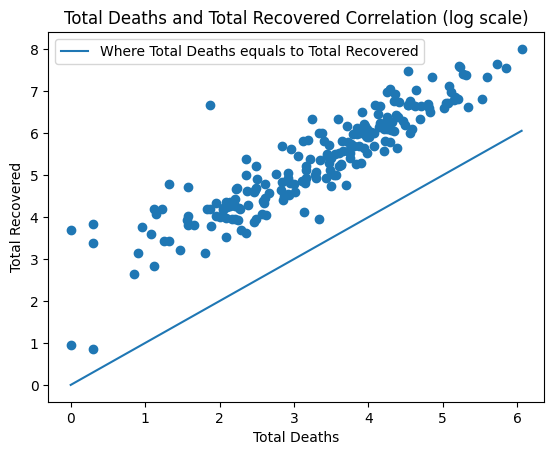

In [12]:
correlation_2_attr('Total Deaths','Total Recovered')

`Comment:` 
- All countries have more recovered cases than death cases.
- Recovered cases and death cases have positive linear correlation.

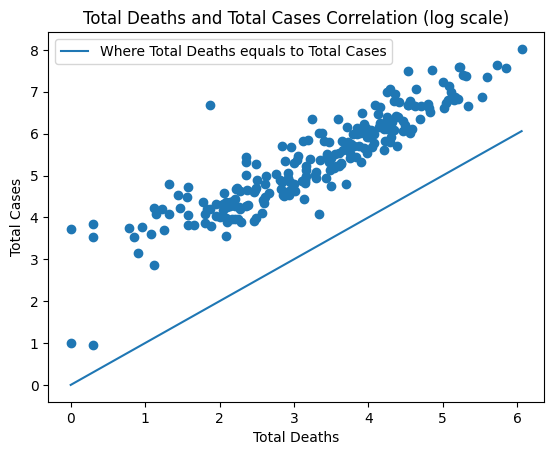

In [13]:
correlation_2_attr('Total Deaths','Total Cases')

In [14]:
Continent = df.dropna().groupby('Continent').sum()#.astype(int)
Continent[['Total Deaths','Total Recovered','Active Cases']]

C:\Users\ACER\AppData\Local\Temp\ipykernel_7856\4075509144.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Continent = df.dropna().groupby('Continent').sum()#.astype(int)


,Total Deaths,Total Recovered,Active Cases
Continent,,,
Africa,227757.0,10897749.0,362966.0
Asia,1434144.0,177367198.0,13458618.0
Australia/Oceania,25219.0,13758278.0,62387.0
Europe,2016458.0,241748082.0,2202301.0
North America,1597613.0,119642532.0,2394523.0
South America,1329250.0,65501264.0,268813.0


- Radar chart code is referenced from [website](https://betterdatascience.com/radar-charts-matplotlib-plotly/)

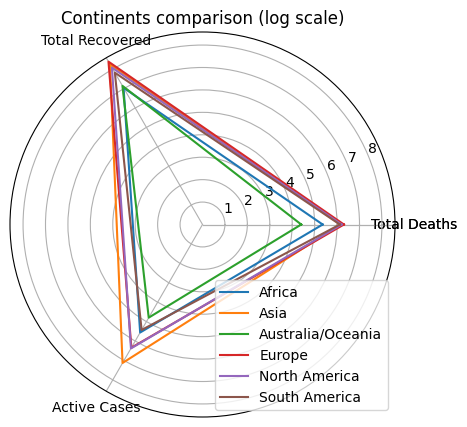

In [15]:
categories = list(Continent.columns[1:4])
categories = [*categories,categories[0]]

label_loc = np.linspace(start=0, stop=2*np.pi, num=4)

plt.figure(figsize=(5, 5))
plt.subplot(polar=True)
for i in range(len(Continent.index)):
    data = list(Continent.iloc[i,1:4].apply(lambda x: tp(x)))
    # print([*data,data[0]])
    plt.plot(label_loc, [*data,data[0]], label=Continent.index[i])

plt.title('Continents comparison (log scale)')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

`Comment:` 
- Recovered rate is high in all continents.
- Asia has highest total cases but the number of recovered and deaths is near to America and Europe.
- 

In [16]:
percent_continent = Continent[['Total Recovered','Total Deaths','Active Cases']].div(Continent['Total Cases'], 0)*100
percent_continent

,Total Recovered,Total Deaths,Active Cases
Continent,,,
Africa,94.858124,1.982483,3.159393
Asia,92.253841,0.745940,7.000219
Australia/Oceania,99.367278,0.182141,0.450582
Europe,98.284826,0.819809,0.895365
North America,96.771022,1.292205,1.936773
South America,97.618362,1.981018,0.400620


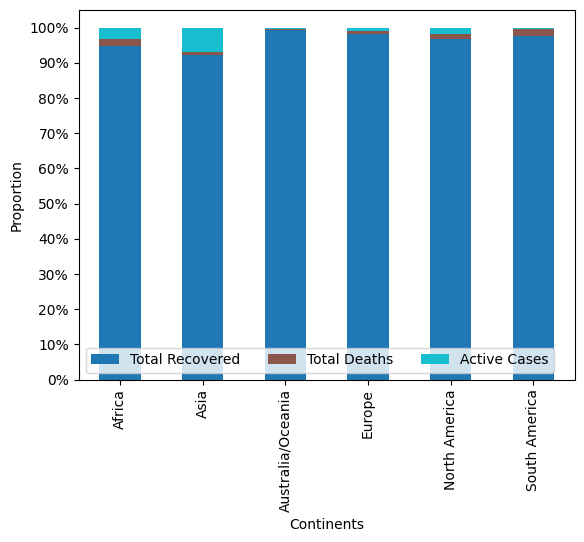

In [19]:
from matplotlib.ticker import FormatStrFormatter

percent_continent.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10')

plt.legend(ncol=3)
plt.xlabel("Continents")
plt.ylabel("Proportion")
plt.yticks(range(0,101,10))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d%%'))
plt.show()